In [30]:
import db_manager as man
import pandas as pd
import matplotlib.pyplot as plt

leggo i db di origine

In [31]:
df = pd.read_csv('Mars_crater_db_complete.csv')
volcano_df = pd.read_csv('vulcani_marte.csv')

gestisco il db dei crateri

In [32]:
#Creo un nuovo dataframe con solo le colonne di interesse
df = df[['CRATER_ID', 'LATITUDE_CIRCLE_IMAGE', 'LONGITUDE_CIRCLE_IMAGE', 'DIAM_CIRCLE_IMAGE', 'DEPTH_RIMFLOOR_TOPOG']]

#Rinomino le colonne
df.columns = ['id', 'lat', 'lon', 'diam', 'depth']

df_filtered = man.filter_lat(df,-45, 45)

#stampo le prime 5 righe del database filtrato
print(df_filtered.head())
#stampo la dimensione del database filtrato
print(df_filtered.shape)


             id     lat      lon    diam  depth
6405  02-000000  36.748 -167.572  376.35   0.29
6406  02-000001  31.119 -173.155  189.85   0.44
6407  02-000002  36.405 -172.817  130.81   0.46
6409  02-000004  34.680 -132.517   65.49   0.37
6410  02-000005  43.974 -141.039   61.52   0.54
(305243, 5)


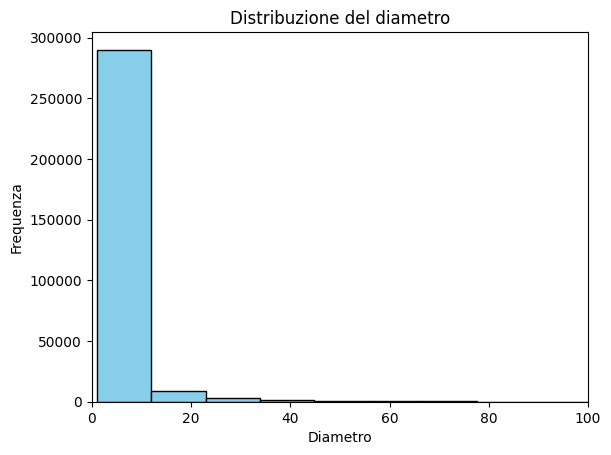

In [33]:
#visualizzo la distribuzione dell'attributo "diam" del database filtrato
plt.hist(df_filtered['diam'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribuzione del diametro')
plt.xlabel('Diametro')
plt.ylabel('Frequenza')

# Imposta i limiti dell'asse x
plt.xlim(xmin=0, xmax=100)  # Modifica questi valori in base ai tuoi dati

plt.show()

In [34]:
#salvo il nuovo database
df_filtered = man.filter_diam(df_filtered, 1.5)
print(df_filtered.shape)
df_filtered.to_csv('crateri_marte.csv', index=False)

(150937, 5)


gestisco il db dei vulcani

In [35]:
print(volcano_df.columns.tolist())
volcano_df = volcano_df[['name', 'lat', 'lon180e']]
print(volcano_df.columns.tolist())
volcano_df.columns = ['name', 'lat', 'lon']

['name', 'peri', 'dia', 'area', 'reference', 'name2', 'type', 'group', 'edificea', 'edificeb', 'source', 'typehodges', 'lat', 'lon180e', 'img', 'max_1', 'range_1', 'mean']
['name', 'lat', 'lon180e']


In [36]:
volcano_df = man.filter_lat(volcano_df, -45, 45)

In [37]:
print(volcano_df.head())
print(volcano_df.shape)

                                    name       lat       lon
0                           Jovis Tholus  18.21190 -117.3980
5                   Sinai buried caldera -13.19920  -77.1695
6  Apollinaris Patera, 44 in Xiao et al.  -8.49625  174.3940
7                         Ulysses Tholus   2.96900 -121.5260
8                          Biblis Tholus   2.39135 -123.8940
(606, 3)


In [38]:
volcano_df.to_csv('vulcani_marte_filtrato.csv', index=False)